<a href="https://colab.research.google.com/github/tak595/Math-Refresher/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email
from scipy import stats

"""### Load Data"""

df = pd.read_csv("/content/emails_MT.csv")

"""### Data Exploration"""

# view first 5 rows of the dataset
df.head()

# get shape of the data
df.shape

# a sample email
print(df.loc[1]['message'])

# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

# get date
e.get('Date')

# show message body
e.get_payload()

Message-ID: <12206143.1075844795936.JavaMail.evans@thyme>
Date: Mon, 7 May 2001 02:37:00 -0700 (PDT)
From: exchangeinfo@nymex.com
To: sara.shackleton@enron.com
Subject: (01-149) Silver and Gold Options Expiration Operational Procedures
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: quoted-printable
X-From: exchangeinfo@nymex.com
X-To: sara.shackleton@enron.com
X-cc: 
X-bcc: 
X-Folder: \Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Notes inbox
X-Origin: SHACKLETON-S
X-FileName: sshackle.nsf

Notice No. 01-149
May 7, 2001

TO:
All COMEX Division Members/Member Firms
All COMEX Division Clearing Members
All COMEX Division Floor Traders
All COMEX Division Operations Managers

FROM:
Michael Campanelli, Vice President
Floor Operations, COMEX Division

RE:
Options Expiration Operational Procedures for the Trading Floor and Clearin=
g=20
Members
___________________________________________________________________________=
___

The expiration date

'Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\nAll COMEX Division Members/Member Firms\r\nAll COMEX Division Clearing Members\r\nAll COMEX Division Floor Traders\r\nAll COMEX Division Operations Managers\r\n\r\nFROM:\r\nMichael Campanelli, Vice President\r\nFloor Operations, COMEX Division\r\n\r\nRE:\r\nOptions Expiration Operational Procedures for the Trading Floor and Clearin=\r\ng=20\r\nMembers\r\n___________________________________________________________________________=\r\n___\r\n\r\nThe expiration date for the June 2001 options contract for Silver (SO M1) a=\r\nnd=20\r\nGold (OG M1) is Friday, May 11, 2001.\r\n\r\nGENERAL OPERATIONAL PROCEDURES\r\n\r\nAll Clearing Members and Qualified Floor Traders that carried an options=20\r\nposition as of the close of business day prior to the expiration day, or=20\r\nengaged in trading activity on Expiration Day in the expiring options=20\r\ncontract will be required to have a knowledgeable, duly authorized on-line=\r\n=20\r\ntrade entry 

In [38]:
"""### Extract headers"""

# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,Unnamed: 0,file,message,date,subject,X-Folder,X-From,X-To
0,1,dasovich-j/sent/4513.,Message-ID: <20784775.1075843889715.JavaMail.e...,"Thu, 10 May 2001 07:58:00 -0700 (PDT)",,\Jeff_Dasovich_June2001\Notes Folders\Sent,Jeff Dasovich,schub@socrates.berkeley.edu
1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com
2,3,kitchen-l/sent_items/149.,Message-ID: <23630403.1075840958987.JavaMail.e...,"Thu, 24 Jan 2002 07:33:35 -0800 (PST)",,"\ExMerge - Kitchen, Louise\Sent Items","Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...",'mark.bridges@ubsw.com'


In [43]:
"""### Extract Message Body"""

def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,Unnamed: 0,file,message,date,subject,X-Folder,X-From,X-To,body
0,1,dasovich-j/sent/4513.,Message-ID: <20784775.1075843889715.JavaMail.e...,"Thu, 10 May 2001 07:58:00 -0700 (PDT)",,\Jeff_Dasovich_June2001\Notes Folders\Sent,Jeff Dasovich,schub@socrates.berkeley.edu,"Marybeth:\r\n\r\nI apologize. As I mentioned, ..."
1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\..."
2,3,kitchen-l/sent_items/149.,Message-ID: <23630403.1075840958987.JavaMail.e...,"Thu, 24 Jan 2002 07:33:35 -0800 (PST)",,"\ExMerge - Kitchen, Louise\Sent Items","Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...",'mark.bridges@ubsw.com',What is the name of the website where all of t...


        Date  Emails Sent
0  Wednesday        20628
1    Tuesday        20530
2     Monday        18815
3   Thursday        18786
4     Friday        17396
5     Sunday         2069
6   Saturday         1776


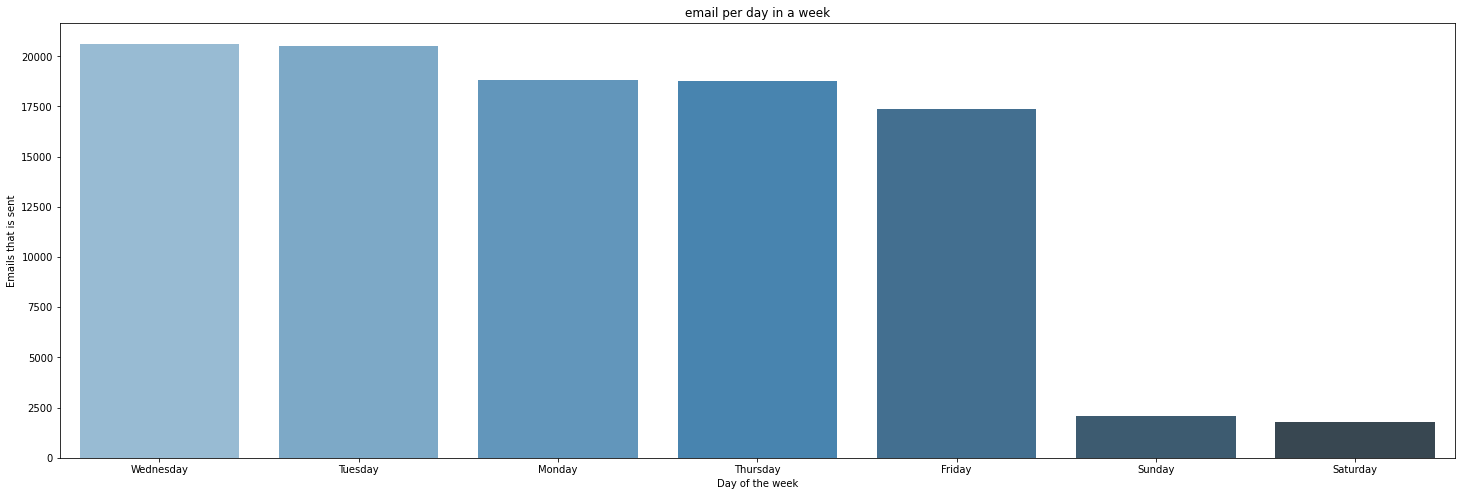

In [76]:
"""### Visualize the highest day  of email in a week"""

df['date'] = pd.to_datetime(df['date'], utc=True)
dates = pd.DataFrame(df['date'].dt.day_name().value_counts()[:len(df.index)])
dates.reset_index(inplace=True)
dates.columns = ["Date", "Emails Sent"]
print(dates)

"""**Visualize bottom 20 highest email sender employees**"""

plt.figure(figsize=(25,8))

sns.barplot(y="Emails Sent", x="Date", data=dates, palette="Blues_d")
plt.title("email per day in a week")
plt.xlabel("Day of the week")
plt.ylabel("Emails that is sent")
plt.show()

In [44]:
"""### Employee Names"""

df['file'][:10]

def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,Unnamed: 0,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,1,dasovich-j/sent/4513.,Message-ID: <20784775.1075843889715.JavaMail.e...,"Thu, 10 May 2001 07:58:00 -0700 (PDT)",,\Jeff_Dasovich_June2001\Notes Folders\Sent,Jeff Dasovich,schub@socrates.berkeley.edu,"Marybeth:\r\n\r\nI apologize. As I mentioned, ...",dasovich-j
1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s
2,3,kitchen-l/sent_items/149.,Message-ID: <23630403.1075840958987.JavaMail.e...,"Thu, 24 Jan 2002 07:33:35 -0800 (PST)",,"\ExMerge - Kitchen, Louise\Sent Items","Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...",'mark.bridges@ubsw.com',What is the name of the website where all of t...,kitchen-l


In [45]:
"""### Look into X-Folder"""

print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

number of folders:  100000
number of unique folders:  3799


,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,1259
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,1116
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,1059
3,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,1005
4,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,1000
5,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,946
6,\Kay_Mann_June2001_3\Notes Folders\Sent,910
7,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,858
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,838
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,811


In [71]:
"""### Finding the amount that a specific person email that they sent"""

specificEmail = pd.DataFrame(df['X-From'].str.lower())
theTotal = (specificEmail.values == "soblander@carrfut.com").sum()
print(theTotal)


111


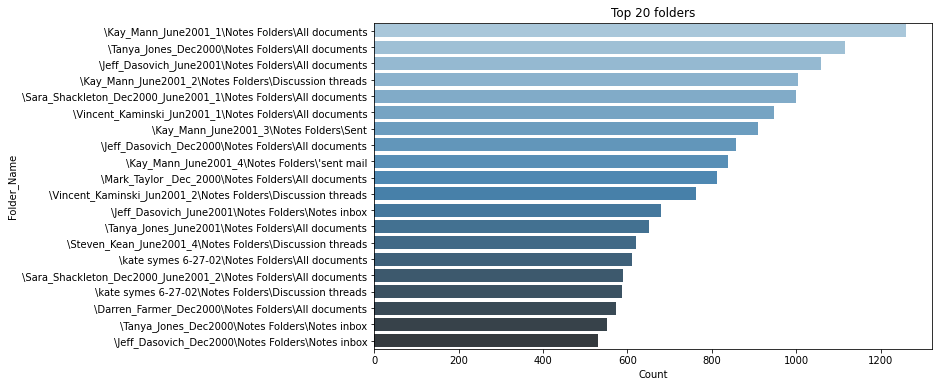

In [46]:
"""### Visualize top 20 folders"""

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

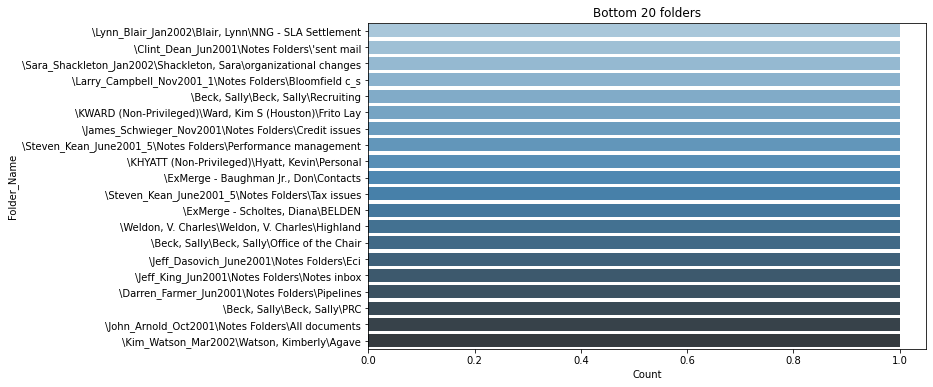

In [53]:
"""### Visualize bottom 20 folders"""

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[-20:, :], palette="Blues_d")
plt.title("Bottom 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [78]:
"""**arithmetic of Folders**"""

allFolder = pd.DataFrame(unique_emails['count'].value_counts()[:len(df.index)])

print("Mean of folders is: ", np.mean(allFolder))
print("Median of folder is: ", np.median(allFolder))
print("Median Absolute deviation of folder is: ", stats.median_absolute_deviation(allFolder))

Mean of folders is:  count    15.253012
dtype: float64
Median of folder is:  2.0
Median Absolute deviation of folder is:  [1.4826]


In [47]:
"""**Let's see top 20 highest email sender employee**"""

top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,5367
1,dasovich-j,5356
2,kean-s,4885
3,mann-k,4610
4,jones-t,3809
5,shackleton-s,3648
6,taylor-m,2655
7,farmer-d,2515
8,germany-c,2393
9,beck-s,2268


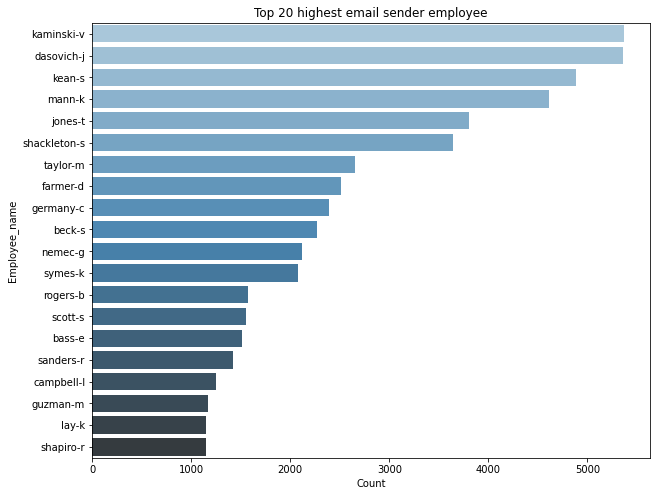

In [48]:
"""**Visualize top 20 highest email sender employees**"""

plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

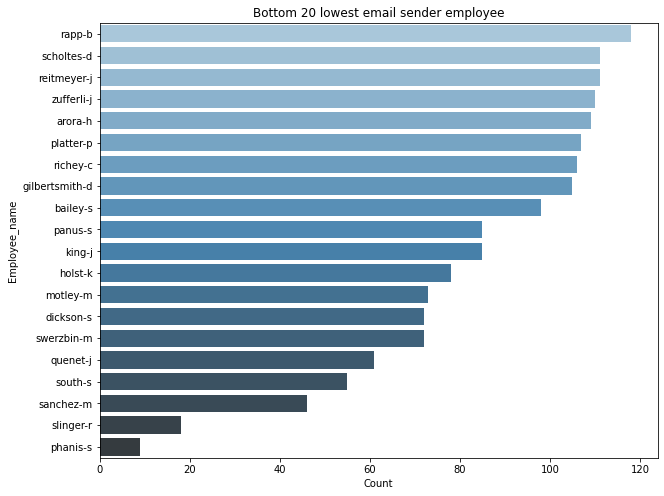

In [49]:
"""**Let's see bottom 20 lowest sender employee**"""

bottom_20 = pd.DataFrame(df['employee'].value_counts()[-20:])
bottom_20.reset_index(inplace=True)
bottom_20.columns = ["Employee_name", "Counts"]
bottom_20

"""**Visualize bottom 20 lowest email sender employees**"""

plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=bottom_20, palette="Blues_d")
plt.title("Bottom 20 lowest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [77]:
"""**arithmetic of email sender employee**"""

All = pd.DataFrame(df['employee'].value_counts()[:len(df.index)])

print("The Mean of email Sender: ", np.mean(All))
print("The Median of email Sender: ", np.median(All))
print("The Median Absolute deviation of email sender is: ", stats.median_absolute_deviation(All))

The Mean of email Sender:  employee    666.666667
dtype: float64
The Median of email Sender:  341.0
The Median Absolute deviation of email sender is:  [319.5003]


In [28]:
"""## Data Cleaning and Transformation

**date : column**
"""

import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

04-05-2001 13:51:00


,Unnamed: 0,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,1,dasovich-j/sent/4513.,Message-ID: <20784775.1075843889715.JavaMail.e...,10-05-2001 07:58:00,,\Jeff_Dasovich_June2001\Notes Folders\Sent,Jeff Dasovich,schub@socrates.berkeley.edu,"Marybeth:\r\n\r\nI apologize. As I mentioned, ...",dasovich-j
1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s


In [29]:
"""**Column : X-Folder**"""

print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

\Jeff_Dasovich_June2001\Notes Folders\Sent
Unique Foldes:  1217


array(['sent', 'notes inbox', 'sent items', 'deleted items',
       'all documents', 'discussion threads', "'sent mail", 'alaska gas',
       'inbox', 'shopping', 'miscellaneous', 'wilson, shona', 'calendar',
       'old messages', 'move', 'corp info_announcements', 'untitled',
       'eesirenewableenergy', 'new york', 'brazos'], dtype=object)

In [30]:
"""**Replace empty missing values in subject with np.nan**"""

def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

df.isnull().sum()

# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

# drop missing value rows
df.dropna(axis=0, inplace=True)

df.isnull().sum(), df.shape

(Unnamed: 0    0
 file          0
 message       0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 dtype: int64, (94592, 10))

In [73]:
"""**Finding if every email have a unique subject**"""

print(pd.Series(df.subject).is_unique)

False
